On 12/16/2020, Kristina Nyland e-mailed Amy and me suggesting that it may make more sense to look at the FIRST/VLASS/6-GHz observations and use the data as "colors", rather than assuming a spectral index and interpreting them as light curves.

*Recall that colors in the optical are defined as 

$$ V - B = m_V - m_B = -2.5 \log_{10}(\frac{f_V}{f_B}) $$

We can then define a few colors to help interpret these results:

$$ C - L  = -2.5 \log_{10}(\frac{f_{6GHz}}{f_{1.4GHz}}) $$

$$ C - S = -2.5 \log_{10}(\frac{f_{6GHz}}{f_{3GHz}}) $$

$$ S - L = -2.5 \log_{10}(\frac{f_{3GHz}}{f_{1.4GHz}}) $$

Where L, S, C are the different radio bands.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richardsplot
from matplotlib.transforms import Bbox

/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
! ls

1-FIRST__J115549.44+502116.56_post?RA=11+55+49.44++50+21+16.56&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin__img-2.fits
1045+5202
1045+5202-mosaic.fits
1129+5120
1129+5120-mosaic.fits
1155+5021
1155+5021-mosaic.fits
1155+5021_cutoutResults.tgz
1159+5106
1159+5106-mosaic.fits
1429+4747
1429+4747-mosaic.fits
2-FIRST__J115901.65+510630.6_post?RA=11+59+01.656++51+06+30.6&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
2-VLASS__1.2.ql.T23t12.J115901.65+510630.6.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
3-FIRST__J142943.05+474726.52_post?RA=14+29+43.056++47+47+26.52&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
3-VLASS__1.2.ql.T22t15.J142943.05+474726.52.10.2048.v1.I.ite

In [3]:
#Load in data from variability table
df = pd.read_csv("../all_var_figs.csv")
df

,Name,z,S1p4_FCat,S1p4_Fcat_e,S1p4_FIRST,S1p4_err,S6_FIRST,S6_FIRST_err,S6_FIRST_alpha0,S6_FIRST_alpha0_err,...,S6_Aconfig,S6_Aconfig_err,L6_Aconfig,L6_Aconfig_alpha0,L6_Aconfig_uplim,L6_Aconfig_lolim,DATE_VLAA,CLASS,Alpha,VAR
0,083353.88+422401.8,0.249,229.81,0.145109,229810,145,82889.378614,151.646727,229570.0,420.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
1,084347.84+203752.4,0.227,3.11,0.151364,3110,151,1036.252632,50.548909,2870.0,140.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,1.0
2,085632.99+595746.8,0.283,25.04,0.155956,25040,155,8950.767504,64.991454,24790.0,180.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
3,092837.98+602521.0,0.295,NaN,NaN,11750,1941,4152.231799,686.020906,11500.0,1900.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
4,093200.07+553347.4,0.266,5.22,0.099172,5220,99,1787.264992,104.708454,4950.0,290.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,161711.42+063833.4,0.229,NaN,NaN,630,0,227.470090,0.000000,630.0,0.0,...,466.2,7.100000,22.834258,22.771572,0.006564,-0.006665,2019-08,RQ,-0.7,0.0
66,161723.67+085414.7,0.206,NaN,NaN,450,0,162.478636,0.000000,450.0,0.0,...,386.7,18.164801,22.652190,22.595246,0.019936,-0.020895,2019-08,RQ,0.0,0.0
67,161940.56+254323.0,0.269,1.66,0.141143,1660,141,516.320998,39.717000,1430.0,110.0,...,407.0,21.633308,22.929946,22.857523,0.022492,-0.023720,2019-08,RQ,-0.7,0.0
68,162750.54+473623.5,0.262,1.48,0.136389,1480,136,454.940180,39.717000,1260.0,110.0,...,441.0,12.000000,22.939355,22.868614,0.011660,-0.011981,2019-09,RQ,-0.7,0.0


In [4]:
! ls ../..

AASPlots
AWK_CONDON.txt
AmpSelfCal
BarvainisRQQs.csv
BootCamp
CASA_Images
CASA_Notebooks
CONDONTEST.csv
CONDON_POSITION_ERRORSp1.csv
CoAS_Poster.pdf
DR7
FITS_Images
FITS_VLBA
HST_archival_spectra
HerreraRuiz2016RQQs.csv
ICA_reconstructions.pdf
ImageTextFiles
Images_png
Kellerman2016
MIZ2.csv
Mosaics
OIII_spectra
OpticalProperties.csv
OpticalSpectra
PAPER_11_11_2020.pdf
Paper.rtf
PaperDraft_10-07-2020.pdf
PaperPlots
PaperPlots_fig8_bottompanel.pdf
Paper_drafts
Papers_used.txt
ParentSample_DR7props.csv
ParentSample_speclist.txt
Posters
PyBDSF_macdownload.txt
REU_Paper_McCaffrey.pdf
REU_Paper_draft1.pdf
REU_Paper_draft2.pdf
REU_Talk
REU_paper.ipynb
RIRLQs_Kellermann16.csv
RIRLQs_sources_proposal_2022a
RI_RL_SunMoonCheck.txt
RQQ_Images.pdf
RQQfigs.csv
RQQfigs_DR7.csv
RQQfigs_final_tableprops_011822.csv
RQQfigs_final_tableprops_072121.csv
RadioProperties.csv
RichardsvsMcC_luminositydistribution.pdf
SB1_sources
Score_over_Stotal.ipynb
SpecIndex_Images
SpringFinalFigs_moreParams.csv
UlvestadR

In [5]:
df2 = pd.read_csv("../../radeccoords_29RQQs_forvariability.csv")
df2.sort_values("Name", inplace=True)
df2

,Name,RA,DEC.,Speak,e_Speak,Speak2,e_sPeak2,eSpeak_fin,Epoch
3,0822+4553,08 22 05.24,+45 53 49.1,420,0,453.60,0.0,0.000000,2
0,0843+5357,08 43 13.41,+53 57 18.8,360,0,414.00,0.0,0.000000,1
17,0856+1057,08 56 40.78,+10 57 55.8,630,130,724.50,149.5,176.862941,1
11,0935+4819,09 35 09.48,+48 19 10.2,810,130,874.80,140.4,185.672857,2
18,1000+1047,10 00 33.88,+10 47 23.7,760,130,874.00,149.5,188.005984,1
19,1004+1510,10 04 38.82,+15 10 57.3,435,130,500.25,149.5,163.119013,1
12,1010+3003,10 10 00.68,+30 03 21.5,950,130,1026.00,140.4,200.046020,2
13,1013+2212,10 13 25.43,+22 12 29.4,630,130,680.40,140.4,169.240687,2
4,1045+2933,10 45 28.30,+29 33 44.7,360,0,388.80,0.0,0.000000,2
1,1045+5202,10 45 41.76,+52 02 35.5,435,0,500.25,0.0,0.000000,1


In [6]:
name = df[["Name"]].values.flatten()
RQ = df[["CLASS"]].values.flatten() == "RQ"
RI = df[["CLASS"]].values.flatten() == "RI"
RL = df[["CLASS"]].values.flatten() == "RL"

In [7]:
special = [ '100033.88+104723.7', '085640.78+105755.8', '101719.02+151620.8', '151132.53+100953.1', '151351.50+262358.1']

In [8]:
fL = df[["S1p4_FIRST"]].values.flatten()
fL_err = df[["S1p4_err"]].values.flatten()

fS = df[["S3_VLASS_final"]].values.flatten()
fS_err = df[["S3_quaderr_final"]].values.flatten()

fC = df[["S(6)_p"]].values.flatten()
fC_err = df[["pmp"]].values.flatten()

In [9]:
fS

array([1.99800e+05, 3.43440e+03, 6.49980e+04, 8.99300e+03, 5.39350e+03,
       3.05100e+04, 2.48055e+04, 1.50984e+04, 1.56492e+04, 3.93984e+05,
       6.57800e+03, 2.84148e+04, 8.59050e+03, 3.87550e+04, 4.39560e+03,
       4.25520e+03, 4.52520e+03, 1.49500e+03, 4.38150e+03, 3.30000e+02,
       1.10860e+03, 1.15560e+03, 1.11240e+03, 9.79560e+02, 9.84400e+02,
       3.40200e+03, 2.05200e+03, 2.43000e+03, 1.92240e+03, 2.59900e+03,
       1.07892e+03, 2.17350e+03, 1.84680e+03, 2.01960e+03, 2.06280e+03,
       1.50650e+03, 8.29150e+02, 1.36080e+03, 3.05640e+03, 1.50650e+03,
       2.25400e+03,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [10]:
fS[RQ] = df2[["Speak2"]].values.flatten()
fS_err[RQ] = df2[["eSpeak_fin"]].values.flatten()
fS, fS_err

(array([1.99800e+05, 3.43440e+03, 6.49980e+04, 8.99300e+03, 5.39350e+03,
        3.05100e+04, 2.48055e+04, 1.50984e+04, 1.56492e+04, 3.93984e+05,
        6.57800e+03, 2.84148e+04, 8.59050e+03, 3.87550e+04, 4.39560e+03,
        4.25520e+03, 4.52520e+03, 1.49500e+03, 4.38150e+03, 3.30000e+02,
        1.10860e+03, 1.15560e+03, 1.11240e+03, 9.79560e+02, 9.84400e+02,
        3.40200e+03, 2.05200e+03, 2.43000e+03, 1.92240e+03, 2.59900e+03,
        1.07892e+03, 2.17350e+03, 1.84680e+03, 2.01960e+03, 2.06280e+03,
        1.50650e+03, 8.29150e+02, 1.36080e+03, 3.05640e+03, 1.50650e+03,
        2.25400e+03, 4.53600e+02, 4.14000e+02, 7.24500e+02, 8.74800e+02,
        8.74000e+02, 5.00250e+02, 1.02600e+03, 6.80400e+02, 3.88800e+02,
        5.00250e+02, 3.88800e+02, 6.21000e+02, 1.09250e+03, 1.05800e+03,
        4.86000e+02, 4.53600e+02, 4.05000e+02, 4.53600e+02, 5.86500e+02,
        6.15250e+02, 4.69800e+02, 5.06000e+02, 4.31250e+02, 5.75000e+02,
        6.48000e+02, 6.21000e+02, 7.47500e+02, 1.05

In [11]:
#define colors
#12/18/20: still don't have S-band data for the RQQs
C_L = -2.5 * np.log10(fC/fL)
C_S = -2.5 * np.log10(fC/fS)
S_L = -2.5 * np.log10(fS/fL)

In [12]:
#Want to colorcode the points based on quiet/int/loud
colors = np.array(["red", "blue", "yellow"])
col = np.empty(len(df), dtype=str)

col[RQ] = colors[0] ; col[RI] = colors[1] ; col[RL] = colors[2]

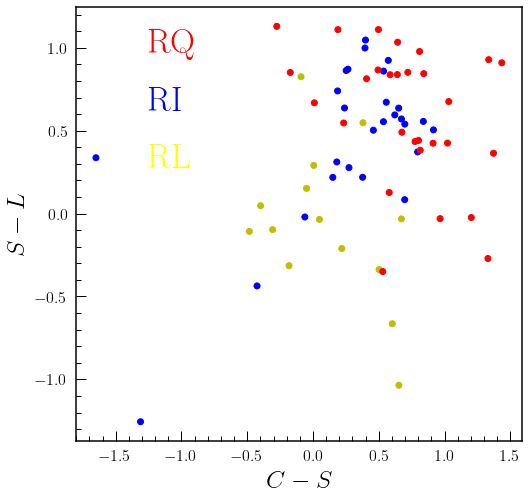

In [13]:
fig = plt.figure(figsize=(8,8))
plt.scatter(C_S, S_L, c=col)
fig.text(0.25, 0.8, "RQ", fontsize=35, color=colors[0])
fig.text(0.25, 0.7, "RI", fontsize=35, color=colors[1])
fig.text(0.25, 0.6, "RL", fontsize=35, color=colors[2])
plt.xlabel("$C-S$", fontsize=25)
plt.ylabel("$S-L$", fontsize=25)
#plt.legend(loc="best")
plt.show()

In [14]:
colors

array(['red', 'blue', 'yellow'], dtype='<U6')

Yellow points are RL;

Purplish points are RI

It *might* make more physical sense to just look at the L-to-S and L-to-C spectral indices

In [15]:
alpha_C_L = np.log10(fC/fL) / np.log10(6/1.4)
alpha_C_S = np.log10(fC/fS) / np.log10(6./3)
alpha_S_L = np.log10(fS/fL) / np.log10(3/1.4)

In [16]:
col

array(['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r'], dtype='<U1')

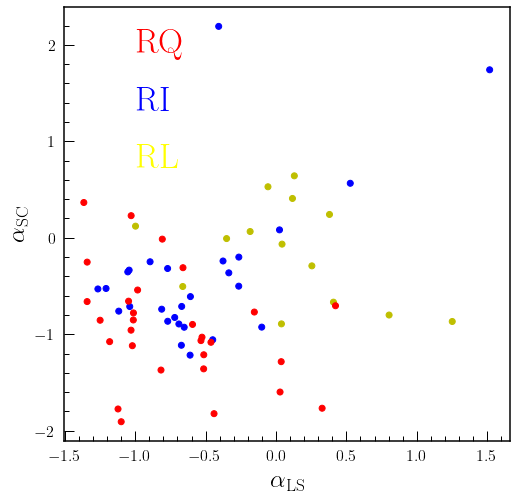

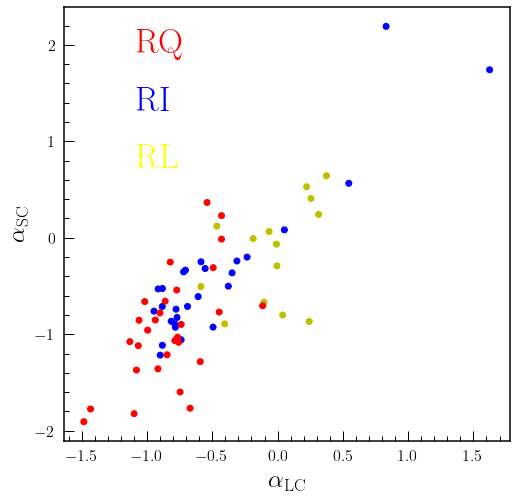

In [17]:
fig = plt.figure(figsize=(8,8))
plt.scatter(alpha_S_L, alpha_C_S, c=col)
fig.text(0.25, 0.8, "RQ", fontsize=35, color=colors[0])
fig.text(0.25, 0.7, "RI", fontsize=35, color=colors[1])
fig.text(0.25, 0.6, "RL", fontsize=35, color=colors[2])
plt.xlabel("$\\alpha_\mathrm{LS}$", fontsize=25)
plt.ylabel("$\\alpha_\mathrm{SC}$", fontsize=25)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.scatter(alpha_C_L, alpha_C_S, c=col)
fig.text(0.25, 0.8, "RQ", fontsize=35, color=colors[0])
fig.text(0.25, 0.7, "RI", fontsize=35, color=colors[1])
fig.text(0.25, 0.6, "RL", fontsize=35, color=colors[2])
plt.xlabel("$\\alpha_\mathrm{LC}$", fontsize=25)
plt.ylabel("$\\alpha_\mathrm{SC}$", fontsize=25)
plt.show()

In [18]:
LSbins = np.linspace(np.min(alpha_S_L), np.max(alpha_S_L), 20)
SCbins = np.linspace(np.min(alpha_C_S), np.max(alpha_C_S), 20)

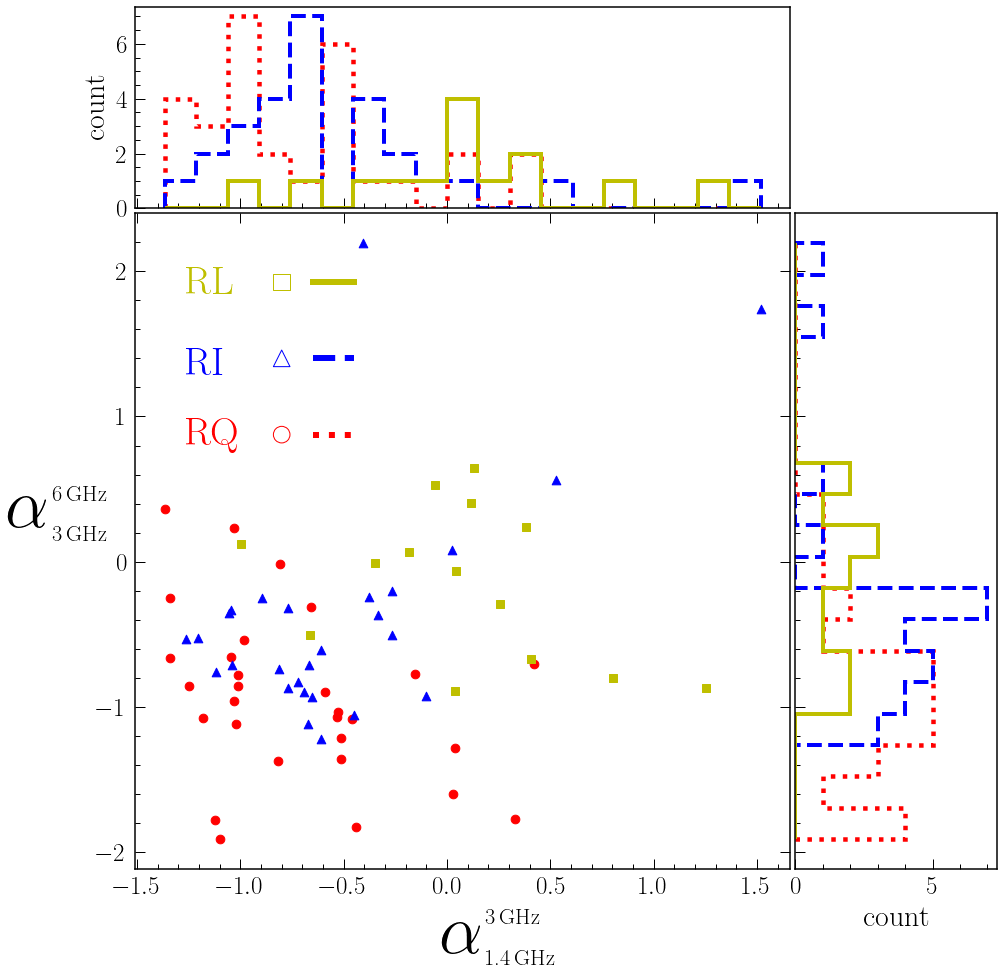

In [19]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(14,14))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_scatter.scatter(alpha_S_L[RQ], alpha_C_S[RQ], color="r", marker="o", s=75)
ax_scatter.scatter(alpha_S_L[RI], alpha_C_S[RI], color="b", marker="^", s=75)
ax_scatter.scatter(alpha_S_L[RL], alpha_C_S[RL], color="y", marker="s", s=75)

ax_scatter.tick_params(axis='both', which='major', labelsize=25)
ax_scatter.set_xlabel("$\\alpha$", fontsize=70)#^\mathrm{3GHz}_\mathrm{1.4GHz}$", fontsize=40)
fig.text(0.4475, 0.045, "3\,GHz", fontsize=22.5, color="k", rotation=0)
fig.text(0.4475, 0.005, "1.4\,GHz", fontsize=22.5, color="k", rotation=0)

ax_scatter.set_ylabel("$\\alpha$", fontsize=70, rotation=0, labelpad=67.5)#^\mathrm{6GHz}_\mathrm{3GHz}$", fontsize=40)
fig.text(0.0175, 0.465, "6\,GHz", fontsize=22.5, color="k", rotation=0)
fig.text(0.0175, 0.425, "3\,GHz", fontsize=22.5, color="k", rotation=0)


xlims = ax_scatter.get_xlim() #Save limits before plotting

ax_histx.hist(alpha_S_L[RQ], align='mid', histtype="step", linewidth=4.5, color="r", linestyle=":", bins=LSbins)
ax_histx.hist(alpha_S_L[RI], align='mid', histtype="step", linewidth=4.0, color="b", linestyle="--", bins=LSbins)
ax_histx.hist(alpha_S_L[RL], align='mid', histtype="step", linewidth=4.0, color="y", linestyle="-", bins=LSbins)
ax_histx.set_ylabel('count', fontsize=30)
ax_histx.tick_params(axis='both', which='major', labelsize=25)

ax_histy.hist(alpha_C_S[RQ], orientation="horizontal", align='mid', histtype="step", linewidth=4.5, color="r", linestyle=":", bins=SCbins)
ax_histy.hist(alpha_C_S[RI], orientation="horizontal", align='mid', histtype="step", linewidth=4.0, color="b", linestyle="--", bins=SCbins)
ax_histy.hist(alpha_C_S[RL], orientation="horizontal", align='mid', histtype="step", linewidth=4.0, color="y", linestyle="-", bins=SCbins)
ax_histy.set_xlabel('count', fontsize=30)
ax_histy.tick_params(axis='both', which='major', labelsize=25)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

fig.text(0.15, 0.67, "RL", fontsize=40, color="y")
fig.text(0.15, 0.59, "RI", fontsize=40, color="b")
fig.text(0.15, 0.52, "RQ", fontsize=40, color="r")

ax_scatter.scatter(-0.8, 1.925, facecolor="None", edgecolor="y", marker="s", s=275)
ax_scatter.plot([-0.65, -0.45], [1.925, 1.925], color="y", linestyle="-", linewidth=6.0)
ax_scatter.scatter(-0.8, 1.4, facecolor="None", edgecolor="b", marker="^", s=275)
ax_scatter.plot([-0.65, -0.45], [1.4, 1.4], color="b", linestyle="--", linewidth=6.0)
ax_scatter.scatter(-0.8, 0.875, facecolor="None", edgecolor="r", marker="o", s=275)
ax_scatter.plot([-0.65, -0.45], [0.875, 0.875], color="r", linestyle=":", linewidth=6.0)

#plt.tight_layout(w_pad=0.9)
#plt.savefig("../../PaperPlots/alphaCS_vs_alphaLS.pdf", bbox_inches=Bbox([[-0.5,0],[14,14]]))
plt.show()

Now lets add some error bars and upper-limit symbols to round off this plot

Recall how we compute spectral indices:

$$ \alpha_{12} = \frac{\log{S_2/S_1}}{\log{\nu_2/\nu_1}} $$

The numerator reduces to:

$$ \log{S_2} - \log{S_1} $$

We know how to deal with errors in sums (square root of sum of squares), so just need to deal with the logs:

$$ \delta (\log{S_2}) = \frac{\delta (S_2)}{S_2 \ln{10}} $$

[ It's just a derivative ]

And now, getting the errors is easy!

$$ \delta(\alpha_{12}) = \sqrt{ ( \frac{\delta (S_2)}{S_2 \ln{10}} )^2 + ( \frac{\delta (S_1)}{S_1 \ln{10}} )^2 } $$

In [20]:
np.log(np.e)

1.0

In [21]:
fS_err[RI], fL_err[RI]

(array([952.86078516, 933.66986299, 986.80270787, 342.41624158,
        955.56076358,   0.        , 268.09431427, 275.19315526,
        284.28784016, 234.85953649, 260.58479907, 752.91106088,
        202.63747334, 558.71083755, 247.87766996, 589.859921  ,
        257.87407304, 491.76646327, 415.92514896, 461.22469429,
        462.44666782, 356.77263124, 202.09587879, 331.58047363,
        677.46391649, 352.44646459, 499.43804911]),
 array([149, 155, 141, 149, 150,   0, 140, 144, 149, 177, 133, 137, 138,
        153, 143, 153, 143, 406, 166, 137, 153,   0, 133, 144, 146, 151,
        143]))

In [22]:
#We definitely don't want to omit any of the three interesting RIQs, so I'm gonna take the VLASS val "as is"
fS_err[len(fS_err[RL])+5]

0.0

In [23]:
alpha_C_S_err = np.sqrt( (fC_err/(fC*np.log(10)))**2 + (fS_err/(fS*np.log(10)))**2 )
alpha_S_L_err = np.sqrt( (fS_err/(fS*np.log(10)))**2 + (fL_err/(fL*np.log(10)))**2 )

In [24]:
alpha_C_S_err, alpha_S_L_err

(array([0.09445284, 0.09622247, 0.09456618, 0.09886602, 0.0954908 ,
        0.09403195, 0.11718051, 0.09457624, 0.09450973, 0.09449666,
        0.09487404, 0.09457593, 0.09553736, 0.09636714, 0.09517957,
        0.09620439, 0.09560653, 0.10050125, 0.09565494, 0.01327651,
        0.10704593, 0.10464662, 0.1120574 , 0.10559358, 0.11613856,
        0.09701979, 0.04551439, 0.10076632, 0.06015906, 0.09949527,
        0.10491909, 0.09955965, 0.09875993, 0.1003003 , 0.09827059,
        0.10367718, 0.10716957, 0.10700934, 0.09786534, 0.10258331,
        0.0973114 , 0.02191035, 0.01557105, 0.10710289, 0.09443422,
        0.09694709, 0.14402757, 0.08730819, 0.11008174, 0.02765898,
        0.02583495, 0.03866174, 0.12073476, 0.08357179, 0.0850783 ,
        0.01639683, 0.14966379, 0.01969047, 0.02242172, 0.12731411,
        0.12318704, 0.0204559 , 0.14237634, 0.05342511, 0.13035147,
        0.01844935, 0.11653105, 0.10553583, 0.09029034, 0.12000607]),
 array([0.0935503 , 0.09763205, 0.09370263, 0.

In [25]:
alpha_C_S

array([ 0.06494636,  0.64244406, -0.86795085, -0.00804359, -0.06580919,
        0.24191716, -0.80101486, -0.89271355,  0.12054865, -0.29107635,
        0.52906309, -0.66748917, -0.50509175,  0.40777881, -0.74044886,
       -0.71293656,  0.0820441 , -0.36353542, -0.82632985,  2.1920985 ,
       -1.1145232 , -0.5305702 , -0.31856003, -0.92756143, -0.71187967,
       -0.20029865, -1.05737118, -0.33534861, -0.24869695, -0.6098782 ,
       -0.50172499, -1.21698183, -0.24070986, -0.76068535,  0.56515101,
        1.74193678, -0.52556431, -0.92642355, -0.89374578, -0.35363695,
       -0.86564202, -1.03086096, -0.01400686, -1.37155886, -0.54158823,
       -1.90730332, -0.25225993, -1.06617708, -0.89848668, -1.11906863,
       -1.35917514,  0.36578238, -1.0836926 , -0.85501283, -0.85236706,
       -0.31010266, -0.76999439, -0.77913505, -1.07708398, -1.21299372,
       -0.6614026 , -1.76737845, -1.59928928, -1.77510072, -0.95796478,
       -1.28456757, -0.70480227, -0.65718652, -1.82366758,  0.22

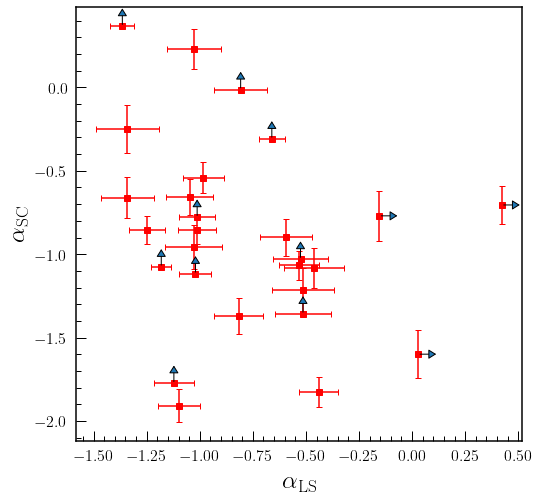

In [26]:
fig = plt.figure(figsize=(8,8))


for i in range(len(alpha_S_L[RQ])):
    #We don't want the point if no meaningful data in FIRST or VLASS (and hence no real estimate of alpha_LS)
    #It's only one point
    if fS_err[RQ][i]==0. and fL_err[RQ][i]==0.:
        continue
    
    #Check if the VLASS value is an upper limit
    #If it is, then alpha_SC is a *lower* limit, since we calculate it with Sc/Ss
    if fS_err[RQ][i]==0.:
        plt.annotate('', xy=(alpha_S_L[RQ][i], alpha_C_S[RQ][i]), xytext=(0, 20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        plt.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], 
                 marker="s", ls="None", capsize=2.8, color="r")
        
    #For the same reason, an upper limit in FIRST yields an upper limit in alpha_LS (since we do Ss/Sl [ess el])
    elif fL_err[RQ][i]==0.:
        plt.annotate('', xy=(alpha_S_L[RQ][i], alpha_C_S[RQ][i]), xytext=(20, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        plt.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                 marker="s", ls="None", capsize=2.8, color="r")
        
    else:
        plt.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                 marker="s", ls="None", capsize=2.8, color="r")

plt.xlabel("$\\alpha_\mathrm{LS}$", fontsize=25)
plt.ylabel("$\\alpha_\mathrm{SC}$", fontsize=25)
plt.show()

Now make the pretty plot

In [27]:
inplot = (((fS_err!=0.)|(fL_err!=0.)))

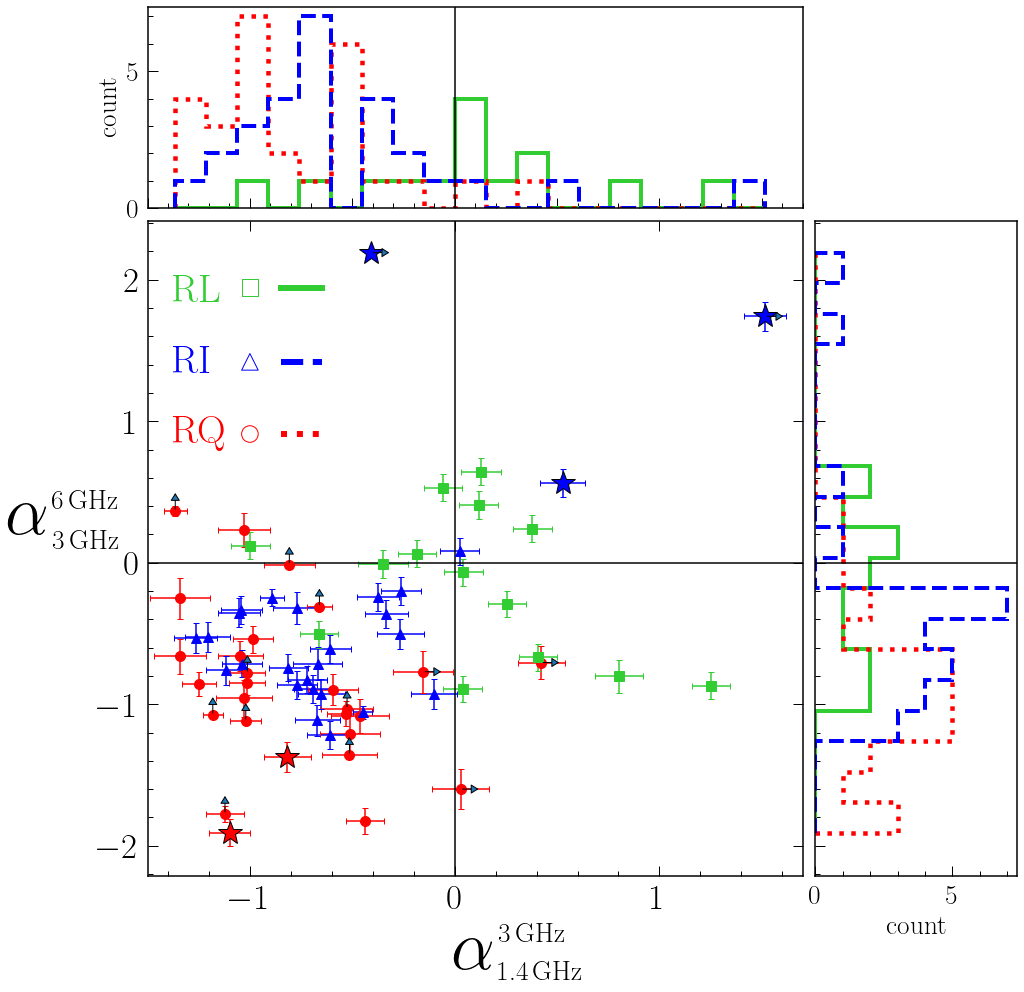

In [53]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.0125

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(14,14))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

#Plot RQ 
for i in range(len(alpha_S_L[RQ])):
    #We don't want the point if no meaningful data in FIRST or VLASS (and hence no real estimate of alpha_LS)
    #It's only two points
    if fS_err[RQ][i]==0. and fL_err[RQ][i]==0.:
        continue
    
    #Check if the VLASS value is an upper limit
    #If it is, then alpha_SC is a *lower* limit, since we calculate it with Sc/Ss
    if fS_err[RQ][i]==0.:
        ax_scatter.annotate('', xy=(alpha_S_L[RQ][i], alpha_C_S[RQ][i]), xytext=(0, 20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        if name[RQ][i] in special:
            ax_scatter.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                        marker="*", ls="None", capsize=2.8, color="r", markeredgecolor="k", ms=25, zorder=2)
        else:
            ax_scatter.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                     marker="o", ls="None", capsize=2.8, color="r", ms=10)
        
    #For the same reason, an upper limit in FIRST yields an upper limit in alpha_LS (since we do Ss/Sl [ess el])
    elif fL_err[RQ][i]==0.:
        ax_scatter.annotate('', xy=(alpha_S_L[RQ][i], alpha_C_S[RQ][i]), xytext=(20, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        if name[RQ][i] in special:
            ax_scatter.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                        marker="*", ls="None", capsize=2.8, color="r", markeredgecolor="k", ms=25, zorder=2)
        else:
            ax_scatter.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                     marker="o", ls="None", capsize=2.8, color="r", ms=10)
        
    else:
        if name[RQ][i] in special:
            ax_scatter.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                        marker="*", ls="None", capsize=2.8, color="r", markeredgecolor="k", ms=25, zorder=2)
        else:
            ax_scatter.errorbar(alpha_S_L[RQ][i], alpha_C_S[RQ][i], xerr=alpha_S_L_err[RQ][i], yerr=alpha_C_S_err[RQ][i], 
                     marker="o", ls="None", capsize=2.8, color="r", ms=10)
        
#Plot RI
for i in range(len(alpha_S_L[RI])):
    #We don't want the point if no meaningful data in FIRST or VLASS (and hence no real estimate of alpha_LS)
    #it's only one point
    #if fS_err[RI][i]==0. and fL_err[RI][i]==0.:
    #    continue
    
        #For the same reason, an upper limit in FIRST yields an upper limit in alpha_LS (since we do Ss/Sl [ess el])
    if fL_err[RI][i]==0.:
        ax_scatter.annotate('', xy=(alpha_S_L[RI][i], alpha_C_S[RI][i]), xytext=(20, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        #ax_scatter.errorbar(alpha_S_L[RI][i], alpha_C_S[RI][i], yerr=alpha_C_S_err[RI][i], 
        #         marker="^", ls="None", capsize=2.8, color="b", ms=10)


    
    #Check if the VLASS value is an upper limit
    #If it is, then alpha_SC is a *lower* limit, since we calculate it with Sc/Ss
    elif fS_err[RI][i]==0.:
        ax_scatter.annotate('', xy=(alpha_S_L[RI][i], alpha_C_S[RI][i]), xytext=(0, 20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        #ax_scatter.errorbar(alpha_S_L[RI][i], alpha_C_S[RI][i], xerr=alpha_S_L_err[RI][i], 
        #         marker="^", ls="None", capsize=2.8, color="b", ms=10)
                
    if name[RI][i] in special:
        ax_scatter.errorbar(alpha_S_L[RI][i], alpha_C_S[RI][i], xerr=alpha_S_L_err[RI][i], yerr=alpha_C_S_err[RI][i], 
                    marker="*", ls="None", capsize=2.8, color="b", markeredgecolor="k", ms=25, zorder=2)
    else:
        ax_scatter.errorbar(alpha_S_L[RI][i], alpha_C_S[RI][i], xerr=alpha_S_L_err[RI][i], yerr=alpha_C_S_err[RI][i], 
                    marker="^", ls="None", capsize=2.8, color="b", ms=10)
        
for i in range(len(alpha_S_L[RL])):
    #We don't want the point if no meaningful data in FIRST or VLASS (and hence no real estimate of alpha_LS)
    if fS_err[RL][i]==0. and fL_err[RL][i]==0.:
        continue
    
    #Check if the VLASS value is an upper limit
    #If it is, then alpha_SC is a *lower* limit, since we calculate it with Sc/Ss
    if fS_err[RL][i]==0.:
        ax_scatter.annotate('', xy=(alpha_S_L[RL][i], alpha_C_S[RL][i]), xytext=(0, 20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        ax_scatter.errorbar(alpha_S_L[RL][i], alpha_C_S[RL][i], xerr=alpha_S_L_err[RL][i], 
                 marker="s", ls="None", capsize=2.8, color="limegreen", ms=10)
        
    #For the same reason, an upper limit in FIRST yields an upper limit in alpha_LS (since we do Ss/Sl [ess el])
    elif fL_err[RL][i]==0.:
        ax_scatter.annotate('', xy=(alpha_S_L[RL][i], alpha_C_S[RL][i]), xytext=(20, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
        ax_scatter.errorbar(alpha_S_L[RL][i], alpha_C_S[RL][i], yerr=alpha_C_S_err[RL][i], 
                 marker="s", ls="None", capsize=2.8, color="limegreen", ms=10)
        
    else:
        ax_scatter.errorbar(alpha_S_L[RL][i], alpha_C_S[RL][i], xerr=alpha_S_L_err[RL][i], yerr=alpha_C_S_err[RL][i], 
                 marker="s", ls="None", capsize=2.8, color="limegreen", ms=10)

ax_scatter.tick_params(axis='both', which='major', labelsize=35)
ax_scatter.set_xlabel("$\\alpha$", fontsize=70)#^\mathrm{3GHz}_\mathrm{1.4GHz}$", fontsize=40)
fig.text(0.4475, 0.0350, "3\,GHz", fontsize=27.5, color="k", rotation=0)
fig.text(0.4475, -0.0025, "1.4\,GHz", fontsize=27.5, color="k", rotation=0)

ax_scatter.set_ylabel("$\\alpha$", fontsize=70, rotation=0, labelpad=67.5)#^\mathrm{6GHz}_\mathrm{3GHz}$", fontsize=40)
fig.text(0.0055, 0.465, "6\,GHz", fontsize=27.5, color="k", rotation=0)
fig.text(0.0055, 0.425, "3\,GHz", fontsize=27.5, color="k", rotation=0)

#Don't histplot points we didn't scatplot!
ax_histx.hist(alpha_S_L[RL], align='mid', histtype="step", linewidth=4.0, color="limegreen", linestyle="-", bins=LSbins)
ax_histx.hist(alpha_S_L[RQ&inplot], align='mid', histtype="step", linewidth=4.5, color="r", linestyle=":", bins=LSbins)
ax_histx.hist(alpha_S_L[RI], align='mid', histtype="step", linewidth=4.0, color="b", linestyle="--", bins=LSbins)
ax_histx.set_ylabel('count', fontsize=27.5)
ax_histx.tick_params(axis='both', which='major', labelsize=27.5)
ax_histx.set_yticks([0,5])

ax_histy.hist(alpha_C_S[RL], orientation="horizontal", align='mid', histtype="step", linewidth=4.0, color="limegreen", linestyle="-", bins=SCbins)
ax_histy.hist(alpha_C_S[RQ&inplot], orientation="horizontal", align='mid', histtype="step", linewidth=4.5, color="r", linestyle=":", bins=SCbins)
ax_histy.hist(alpha_C_S[RI], orientation="horizontal", align='mid', histtype="step", linewidth=4.0, color="b", linestyle="--", bins=SCbins)
ax_histy.set_xlabel('count', fontsize=27.5)
ax_histy.tick_params(axis='both', which='major', labelsize=27.5)

ax_scatter.set_xlim(-1.5, 1.7)
ylims_scat = ax_scatter.get_ylim()
xlims_histy = ax_histy.get_xlim()
ylims_histx = ax_histx.get_ylim()

#Add lines at alpha=0
ax_scatter.plot([ax_scatter.get_xlim()[0], ax_scatter.get_xlim()[1]], [0.0, 0.0], c="k")
ax_scatter.plot([0.0, 0.0], [ax_scatter.get_ylim()[0], ax_scatter.get_ylim()[1]], c="k")
ax_histx.plot([0.0, 0.0], [ax_histx.get_ylim()[0], ax_histx.get_ylim()[1]], c="k")
ax_histy.plot([ax_histy.get_xlim()[0], ax_histy.get_xlim()[1]], [0.0, 0.0], c="k")

ax_scatter.set_xlim(-1.5, 1.7)
ax_scatter.set_ylim(ylims_scat)
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histx.set_ylim(ylims_histx)
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histy.set_xlim(xlims_histy)

fig.text(0.125, 0.67, "RL", fontsize=40, color="limegreen")
fig.text(0.125, 0.60, "RI", fontsize=40, color="b")
fig.text(0.125, 0.53, "RQ", fontsize=40, color="r")

ax_scatter.scatter(-1.0, 1.945, facecolor="None", edgecolor="limegreen", marker="s", s=275)
ax_scatter.plot([-0.85, -0.65], [1.945, 1.945], color="limegreen", linestyle="-", linewidth=6.0)
ax_scatter.scatter(-1.0, 1.42, facecolor="None", edgecolor="b", marker="^", s=275)
ax_scatter.plot([-0.85, -0.65], [1.42, 1.42], color="b", linestyle="--", linewidth=6.0)
ax_scatter.scatter(-1.0, .91, facecolor="None", edgecolor="r", marker="o", s=275)
ax_scatter.plot([-0.85, -0.65], [.91, .91], color="r", linestyle=":", linewidth=6.0)

#plt.tight_layout(w_pad=0.9)
plt.savefig("../../PaperPlots/alphaCS_vs_alphaLS.pdf", bbox_inches=Bbox([[-0.55,-0.1],[13.9,13.9]]))
plt.show()

In [51]:
Bbox?

In the paper, we say that the RQ/RL sources appear to occupy two regions of the above figure.  Gordon pointed out that we should quantify this with a Kolmogorov-Smirnov test.  Do that here:

In [30]:
from scipy.stats import ks_2samp

In [31]:
ks_2samp(alpha_S_L[RQ], alpha_S_L[RL])

KstestResult(statistic=0.6847290640394089, pvalue=0.00010554222666381285)

In [32]:
ks_2samp(alpha_C_S[RQ], alpha_C_S[RL])

KstestResult(statistic=0.5517241379310345, pvalue=0.0026274983880122393)

In [33]:
ks_2samp(alpha_C_L[RQ], alpha_C_L[RL])

KstestResult(statistic=0.8226600985221675, pvalue=7.551005997141758e-07)

In [34]:
ks_2samp((alpha_C_S[RQ]+alpha_S_L[RQ])/2, (alpha_C_S[RL]+alpha_S_L[RL])/2)

KstestResult(statistic=0.8251231527093597, pvalue=6.485413910350957e-07)

----

Now load in the targets that include TGSS/LOFAR data.  Here's the source count breakdown for those targets:

10 matched to TGSS:
- 0 RQ
- 2 RI
- 8 RL, but one has total flux >1 Jy, so VLASS measurement should not be used as per VLASS memo 13

7 matched to LOTSS:
- 5 RQ, two being very solid >1500-mJy detections at 144 MHz
- 1 RI
- 1 RL

Of course, there are some new colors available for this data.  From a quick Google, it looks like 144 MHz frequency lies roughly in the VMF band(?), so I'll call it V-band here for short

$$ L - V  = -2.5 \log_{10}(\frac{f_{1.4GHz}}{f_{144MHz}}) $$

$$ S - V  = -2.5 \log_{10}(\frac{f_{3GHz}}{f_{144MHz}}) $$

$$ C - V  = -2.5 \log_{10}(\frac{f_{6GHz}}{f_{144MHz}}) $$

In [28]:
! ls

1-FIRST__J115549.44+502116.56_post?RA=11+55+49.44++50+21+16.56&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin__img-2.fits
1045+5202
1045+5202-mosaic.fits
1129+5120
1129+5120-mosaic.fits
1155+5021
1155+5021-mosaic.fits
1155+5021_cutoutResults.tgz
1159+5106
1159+5106-mosaic.fits
1429+4747
1429+4747-mosaic.fits
2-FIRST__J115901.65+510630.6_post?RA=11+59+01.656++51+06+30.6&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
2-VLASS__1.2.ql.T23t12.J115901.65+510630.6.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
3-FIRST__J142943.05+474726.52_post?RA=14+29+43.056++47+47+26.52&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
3-VLASS__1.2.ql.T22t15.J142943.05+474726.52.10.2048.v1.I.ite

In [29]:
radio_colors = pd.read_csv("radio_colors_data.csv")
radio_colors

,Name,angDist,_RAJ2000,_DEJ2000,Speak,e_Speak,S_FIRST,e_S_FIRST,S_VLASS,e_S_VLASS,S_Kell,e_S_Kell,CLASS
0,ILTJ104541.82+520235.5,0.621032,161.42430,52.04320,1700.0,100.0,490,150,500.25,0.000000,195.0,11.6,RQ
1,ILTJ111121.72+482046.2,0.372505,167.84050,48.34620,3800.0,100.0,14550,280,15098.40,3256.306308,8132.0,245.2,RL
2,ILTJ112941.98+512050.6,0.301048,172.42490,51.34740,3100.0,100.0,880,121,388.80,0.000000,501.0,44.6,RQ
3,ILTJ115549.44+502116.6,0.723290,178.95600,50.35460,500.0,100.0,450,0,360.00,0.000000,53.4,5.6,RQ
4,ILTJ115901.66+510630.6,0.657970,179.75690,51.10850,300.0,100.0,420,0,510.00,0.000000,49.4,5.4,RQ
5,ILTJ142943.05+474726.5,0.322495,217.42940,47.79070,300.0,100.0,535,150,360.00,0.000000,127.0,6.3,RQ
6,ILTJ145005.05+463521.9,1.088564,222.52100,46.58940,16100.0,100.0,4490,130,2019.60,461.224694,1192.0,41.0,RI
7,J083353.8+422402,0.856867,128.47424,42.40066,250600.0,25300.0,229570,420,199800.00,43038.237139,209000.0,6270.1,RL
8,J083658.7+442601,1.889369,129.24474,44.43381,51600.0,7700.0,9150,120,4255.20,933.669863,2596.0,79.0,RI
9,J085633.0+595748,1.618473,134.13788,59.96342,238700.0,24000.0,24790,180,64998.00,14018.083322,35614.0,1068.6,RL


In [30]:
sV = radio_colors[["Speak"]].values.flatten() ; e_sV = radio_colors[["e_Speak"]].values.flatten()
sL = radio_colors[["S_FIRST"]].values.flatten() ; e_sL = radio_colors[["e_S_FIRST"]].values.flatten()
sS = radio_colors[["S_VLASS"]].values.flatten() ; e_sS = radio_colors[["e_S_VLASS"]].values.flatten()
sC = radio_colors[["S_Kell"]].values.flatten() ; e_sC = radio_colors[["e_S_Kell"]].values.flatten()

In [31]:
rq = radio_colors[["CLASS"]].values.flatten() == "RQ"
ri = radio_colors[["CLASS"]].values.flatten() == "RI"
rl = radio_colors[["CLASS"]].values.flatten() == "RL"

In [32]:
LVcol = np.log10(sL/sV) / np.log10(1.4/.144)
SVcol = np.log10(sS/sV) / np.log10(6/.144)
CVcol = np.log10(sC/sV) / np.log10(6/.144)
CLcol = np.log10(sC/sL) / np.log10(6/1.4)
CScol = np.log10(sC/sS) / np.log10(6/3.)
SLcol = np.log10(sS/sL) / np.log10(3/1.4)

In [33]:
colorcode = radio_colors[["CLASS"]].values.flatten().copy()
colorcode[rq] = 0. ; colorcode[ri] = 1. ; colorcode[rl] = 2. 

In [34]:
col_data = pd.DataFrame(np.array([LVcol, SVcol, CVcol, CLcol, CScol, SLcol, colorcode]).T, \
                      columns=["$L-V$", "$S-V$", "$C-V$", "$C-L$", "$C-S$", "$S-L$", "CLASS"], dtype=float)
col_data

,$L-V$,$S-V$,$C-V$,$C-L$,$C-S$,$S-L$,CLASS
0,-0.546944,-0.327982,-0.580578,-0.633144,-1.359175,0.027164,0.0
1,0.590301,0.369892,0.203986,-0.399773,-0.892714,0.048545,2.0
2,-0.553653,-0.556638,-0.488659,-0.387082,0.365782,-1.071794,0.0
3,-0.046324,-0.088078,-0.599726,-1.464616,-2.753085,-0.292785,0.0
4,0.147938,0.142271,-0.483640,-1.470709,-3.367914,0.254751,0.0
5,0.254344,0.048884,-0.230473,-0.988176,-1.503168,-0.519803,0.0
6,-0.561449,-0.556591,-0.697961,-0.911312,-0.760685,-1.048302,1.0
7,-0.038537,-0.060740,-0.048670,-0.064505,0.064946,-0.182238,2.0
8,-0.760533,-0.669056,-0.801552,-0.865659,-0.712937,-1.004556,1.0
9,-0.995758,-0.348782,-0.510086,0.248953,-0.867951,1.264749,2.0


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


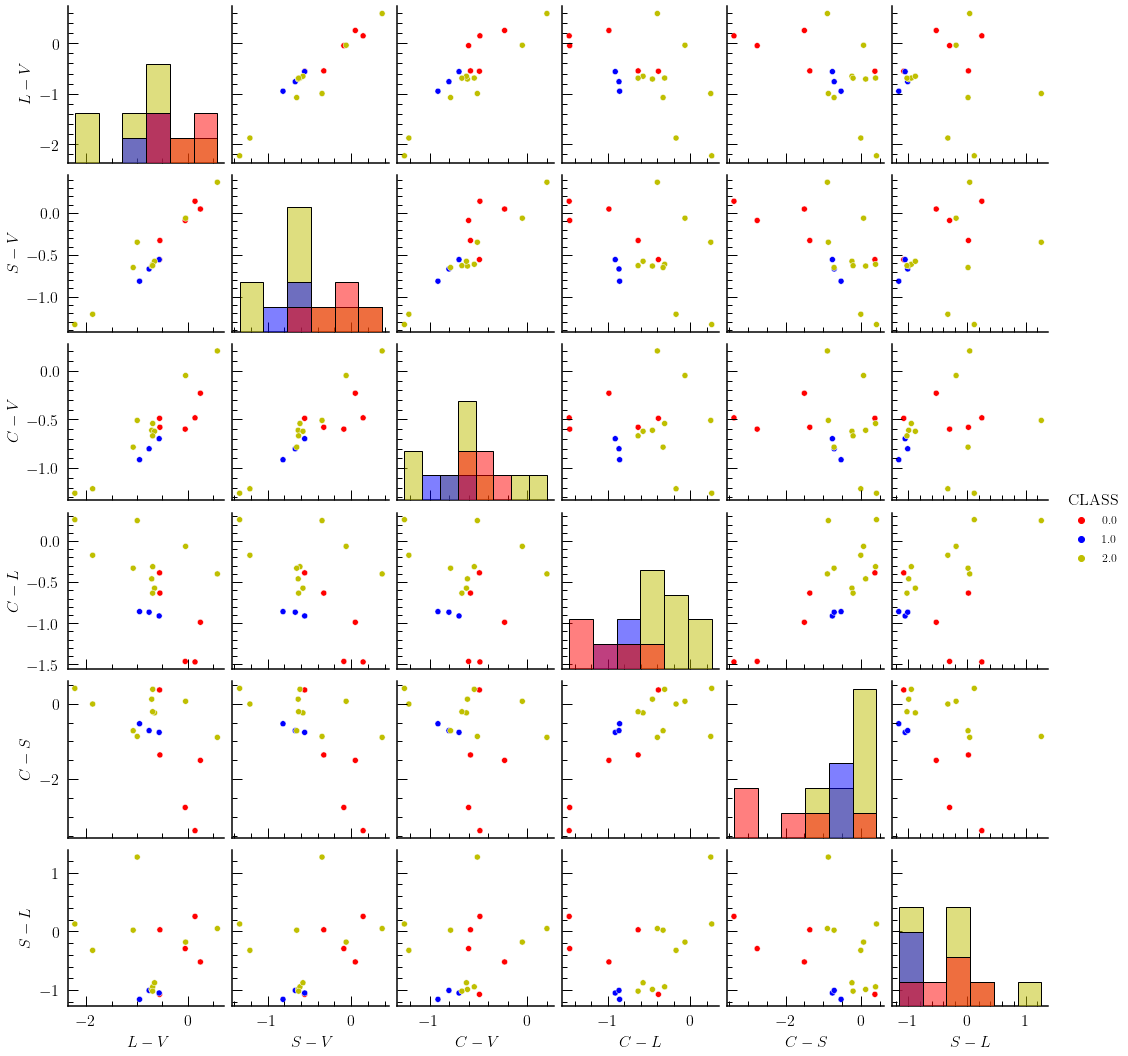

In [35]:
import seaborn as sns
sns.pairplot(col_data, vars=col_data.columns[:-1], diag_kind="hist", hue="CLASS", palette={0.0: "r", 1.0: "b", 2.0: "y"})

CLASS:  0.0 is RQ, 1.0 is RI, 2.0 is RL

---

In [36]:
nu  = np.array([0.144, 1.4, 3., 6.])
S   = np.array([sV, sL, sS, sC]).T
Serr= np.array([e_sV, e_sL, e_sS, e_sC]).T
S, Serr

(array([[1.70000000e+03, 4.90000000e+02, 5.00250000e+02, 1.95000000e+02],
        [3.80000000e+03, 1.45500000e+04, 1.50984000e+04, 8.13200000e+03],
        [3.10000000e+03, 8.80000000e+02, 3.88800000e+02, 5.01000000e+02],
        [5.00000000e+02, 4.50000000e+02, 3.60000000e+02, 5.34000000e+01],
        [3.00000000e+02, 4.20000000e+02, 5.10000000e+02, 4.94000000e+01],
        [3.00000000e+02, 5.35000000e+02, 3.60000000e+02, 1.27000000e+02],
        [1.61000000e+04, 4.49000000e+03, 2.01960000e+03, 1.19200000e+03],
        [2.50600000e+05, 2.29570000e+05, 1.99800000e+05, 2.09000000e+05],
        [5.16000000e+04, 9.15000000e+03, 4.25520000e+03, 2.59600000e+03],
        [2.38700000e+05, 2.47900000e+04, 6.49980000e+04, 3.56140000e+04],
        [8.24000000e+05, 1.15000000e+04, 8.99300000e+03, 8.94300000e+03],
        [2.42000000e+04, 2.79000000e+03, 1.15560000e+03, 8.00000000e+02],
        [1.66500000e+05, 3.32200000e+04, 1.56492000e+04, 1.70130000e+04],
        [5.61760000e+06, 3.52000000e+0

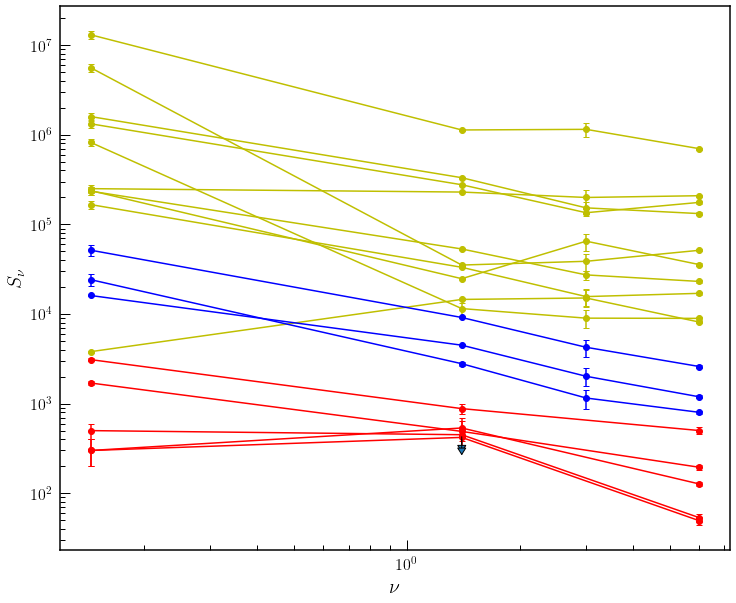

In [37]:
fig = plt.figure(figsize=(12,10))
for i in range(len(S)):

    if radio_colors[["CLASS"]].values.flatten()[i] == "RQ":
        plt.errorbar(x=[nu[0], nu[1], nu[3]], y=S[i,[True,True,False,True]], yerr=Serr[i,[True,True,False,True]], fmt="-o", capsize=2.8, color="r")
        
    elif radio_colors[["CLASS"]].values.flatten()[i] == "RI":
        plt.errorbar(x=nu, y=S[i,:], yerr=Serr[i,:], fmt="-o", capsize=2.8, color="b")

    elif radio_colors[["CLASS"]].values.flatten()[i] == "RL":
        plt.errorbar(x=nu, y=S[i,:], yerr=Serr[i,:], fmt="-o", capsize=2.8, color="y")

    if Serr[i,1]==0.0:
        plt.annotate('', xy=(nu[1], S[i,1]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
"""    
    if Serr[i,2]==0.0:
        plt.annotate('', xy=(nu[2], S[i,2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
"""
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_{\\nu}$", fontsize=20)
plt.xlabel("$\\nu$", fontsize=20)
plt.show()

All 5 RQQs considered here are non-detections in VLASS (so those points aren't plotted); two are non-detections in FIRST as well, indicated by the upper limit symbols above.

In [38]:
#Make a histogram of low-frequency spectral indices
alpha_VL = np.log10(sL/sV) / np.log10(1.4/.144)
typ = radio_colors[["CLASS"]].values.flatten()

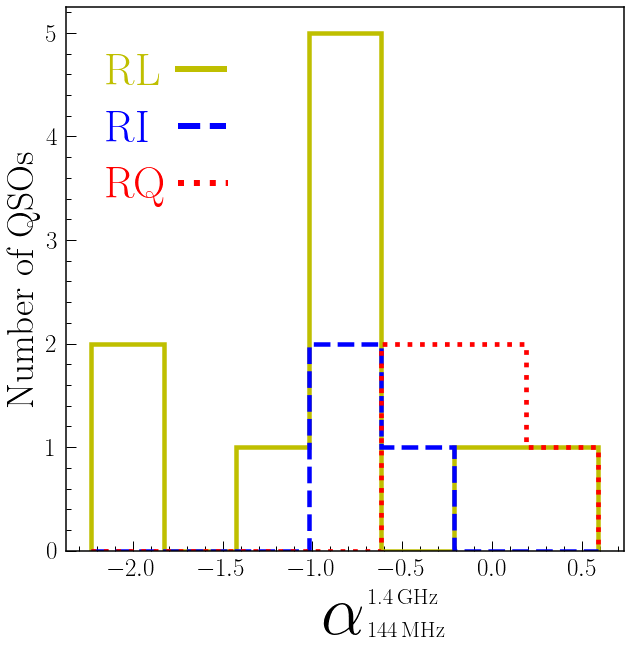

In [39]:
specbins = np.linspace(min(alpha_VL), max(alpha_VL), 8, endpoint=True)

fig = plt.figure(figsize=(10,10))

plt.hist(alpha_VL[typ=="RL"],histtype="step", linestyle="-", linewidth=4.5, color="y", label="Radio-loud", bins=specbins)
plt.hist(alpha_VL[typ=="RI"],histtype="step", linestyle="--", linewidth=4.5, color="b", label="Radio-intermediate", bins=specbins)
plt.hist(alpha_VL[typ=="RQ"],histtype="step", linestyle=":", linewidth=4.7, color="r", label="Radio-quiet", bins=specbins)

#plt.legend(loc="upper left", prop={"size": 22.5})
plt.xlabel("$\\alpha$", fontsize=70)#^\mathrm{3GHz}_\mathrm{1.4GHz}$", fontsize=40)
plt.ylabel("Number of QSOs", fontsize=37.5)
fig.text(0.545, 0.0515, "1.4\,GHz", fontsize=22.5, color="k", rotation=0)
fig.text(0.545, 0.005, "144\,MHz", fontsize=22.5, color="k", rotation=0)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.text(-2.15, 4.5, "RL", fontsize=45, color="y")
plt.text(-2.15, 3.95, "RI", fontsize=45, color="b")
plt.text(-2.15, 3.4, "RQ", fontsize=45, color="r")

plt.plot([-1.75, -1.49], [4.65, 4.65], color="y", linestyle="-", linewidth=6.0)
plt.plot([-1.75, -1.48], [4.1, 4.1], color="b", linestyle="--", linewidth=6.0)
plt.plot([-1.75, -1.47], [3.55, 3.55], color="r", linestyle=":", linewidth=6.0)

#plt.tight_layout()
plt.savefig("../../PaperPlots/lowfreq_specindices_histo.pdf")
plt.show()